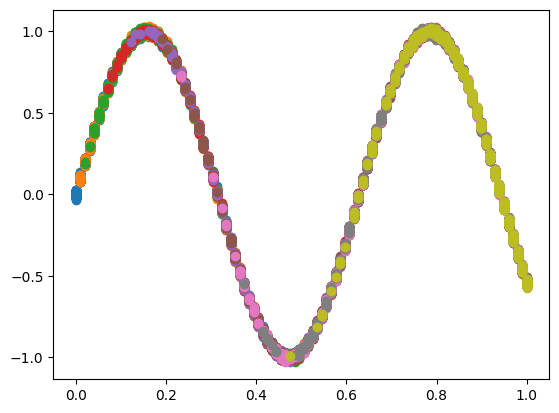

In [ ]:
from data_utils import generate_data_from_function
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
T, X = generate_data_from_function(lambda x: np.sin(10 * x), sparsity=0.1)

plt.plot(T, X, "o")
plt.show()

In [2]:
from neuralint import NeuralInt, train
from data_utils import get_dataloaders
from torch.nn import MSELoss

dataloaders = get_dataloaders(T, X)
model = NeuralInt(input_dim=X.shape[1])
# train(model, MSELoss(), dataloaders["train"], dataloaders["validate"])

c:\Users\Sri Pranav Kunda\Documents\Projects\DimensionalityReduction\.venv\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [3]:
from model_utils import get_imputation_from_checkpoint

subset = dataloaders["test"].dataset
T_test, X_test, _ = subset.dataset[subset.indices]

X_imputed = get_imputation_from_checkpoint(T_test, X_test)

Loaded model checkpoint with epoch: 10, and validation loss: 0.01949403330218047


In [7]:
import torch

X_imputed_mean = torch.mean(X_imputed, axis=0)

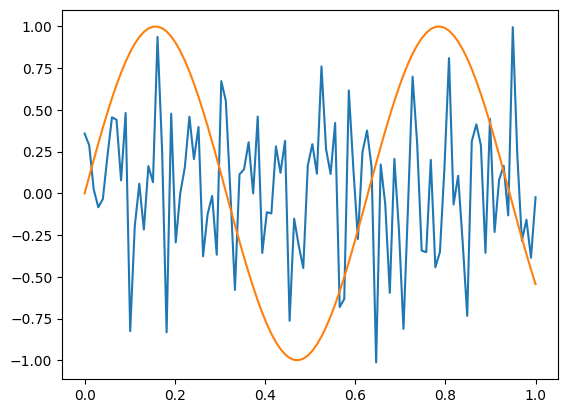

In [16]:
import matplotlib.pyplot as plt

time_values = np.linspace(0, 1, len(X_imputed_mean))
plt.plot(time_values, X_imputed_mean)
plt.plot(time_values, np.sin(10 * time_values))
plt.show()